#### Importando bibliotecas

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

#### Importando bibliotecas de treinamento

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import cv2 as cv
face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

#### Mostrando images

In [54]:
picture_size  = 48
folder_path = 'archive/images/'

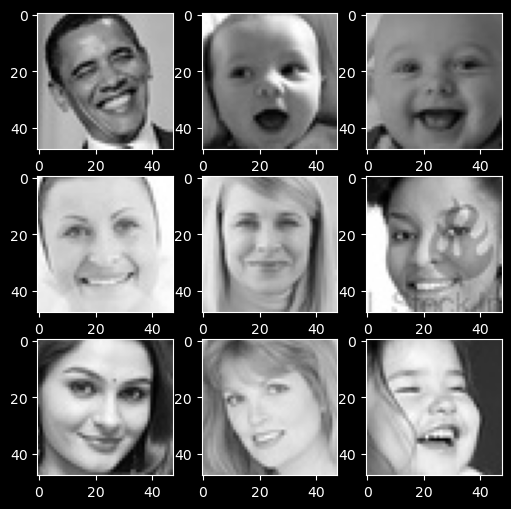

In [56]:
expression = "feliz"

plt.figure(figsize=(6, 6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))  
    plt.imshow(img)
plt.show()

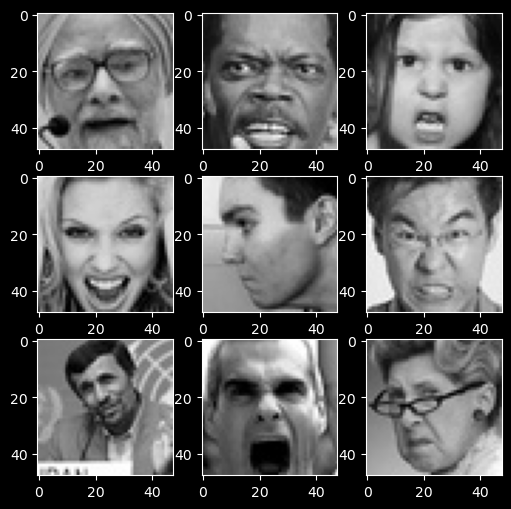

In [57]:
expression = "raiva"

plt.figure(figsize=(6, 6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))  
    plt.imshow(img)
plt.show()

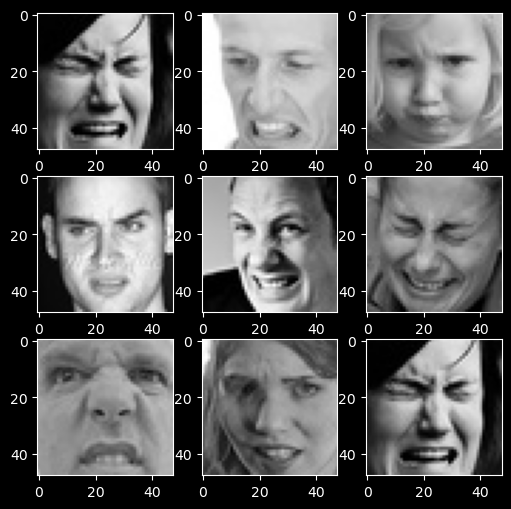

In [58]:
expression = "nojo"

plt.figure(figsize=(6, 6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))  
    plt.imshow(img)
plt.show()

### Criando os datasets de treinamento e validação

In [41]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                            batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)

test_set=datagen_val.flow_from_directory(folder_path+"validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### Contruindo o model da rede neural convolucional

In [43]:

no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [46]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list)

C:\Users\giova\AppData\Local\Temp\ipykernel_15580\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - 338s 1s/step - loss: 1.7941 - accuracy: 0.3085 - val_loss: 1.5835 - val_accuracy: 0.3932 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 228s 1s/step - loss: 1.4526 - accuracy: 0.4447 - val_loss: 1.5621 - val_accuracy: 0.4213 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 226s 1s/step - loss: 1.2880 - accuracy: 0.5055 - val_loss: 1.3405 - val_accuracy: 0.4830 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 534s 2s/step - loss: 1.1951 - accuracy: 0.5453 - val_loss: 1.1927 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 261s 1s/step - loss: 1.1356 - accuracy: 0.5683 - val_loss: 1.2527 - val_accuracy: 0.5126 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 226s 1s/step - loss: 1.0772 - accuracy: 0.5942 - val_loss: 1.2395 - val_accuracy: 0.5409 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 226s 1s/st

In [60]:
# model.save('model.h5')

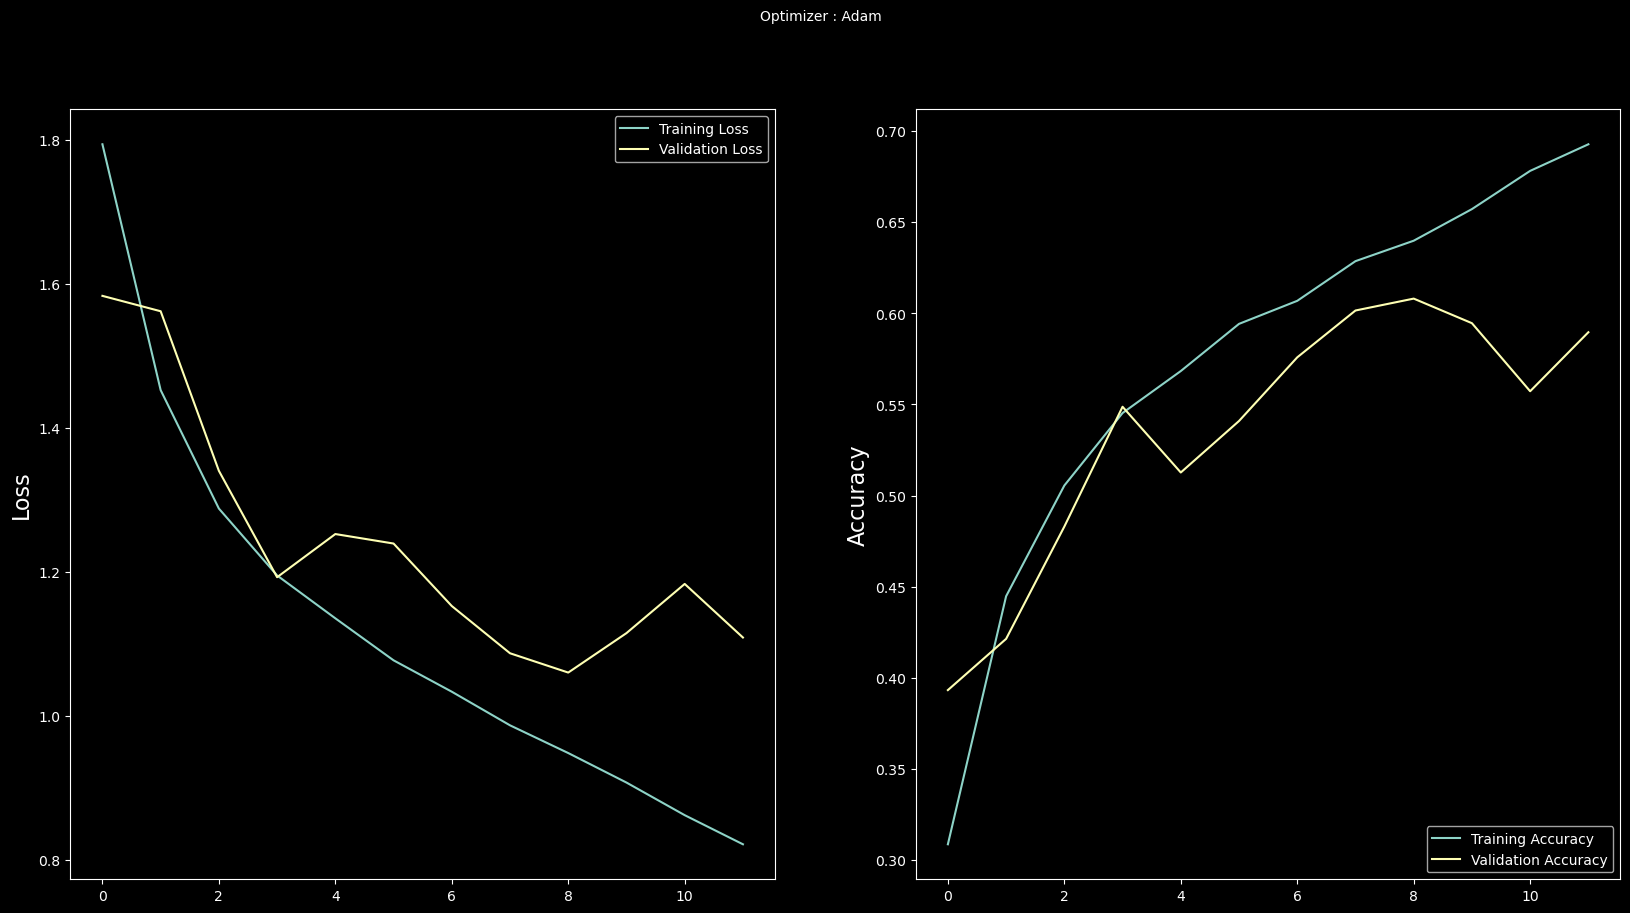

In [49]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Testando o modelo

In [12]:
model = load_model('model.h5')

In [48]:

def process_image(image_file):
    
    img = cv.imread(image_file)
    emotion_labels = ['raiva', 'nojo', 'medo', 'feliz', 'neutro', 'triste', 'surpresa']
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
    
    for (x,y,w,h) in faces:
        print('Coodernadas', x, y, w, h)
        print('Top left', (x, y), 'Bottom right', (x+w, y+h))
        cv.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 255), 2)
        pre_predict = gray[y:y+h,x:x+w]
        pre_predict = cv.resize(pre_predict,(48,48))
        if np.sum([pre_predict])!=0:
            face = pre_predict.astype('float')/255.0
            face = img_to_array(face)
            face = np.expand_dims(face, axis=0)
            prediction = model.predict(face)[0]
            label=emotion_labels[prediction.argmax()]
            print(prediction.argmax(), label)
            label_position = (x,y-10)
            cv.putText(gray, label, label_position, cv.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
        else:
            cv.putText(gray,'No Faces', (30,80), cv.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    
    plt.figure(figsize=(20,10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray, 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 3)
    plt.imshow(pre_predict, 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    
    plt.show()    

Coodernadas 88 94 308 308
Top left (88, 94) Bottom right (396, 402)
1/1 [==============================] - 0s 32ms/step
3 feliz


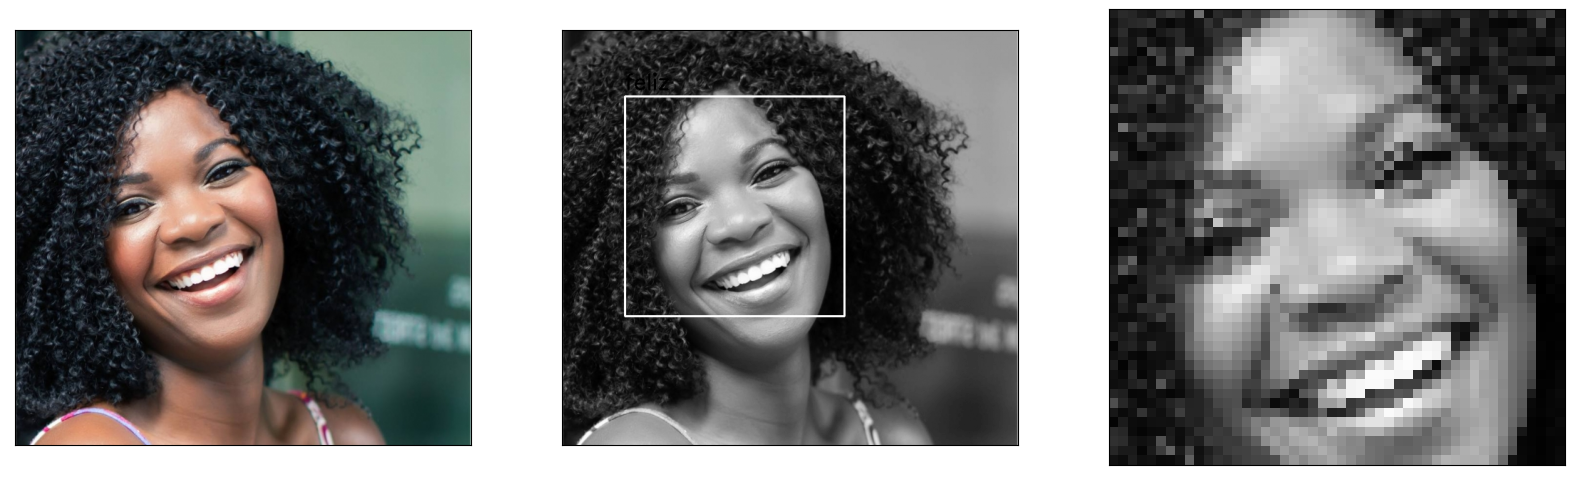

In [49]:
process_image('sorrindo.jpg')